# Introduction

We will use the Student's Performance in Exams for my analysis. This is marks secured by the students in various subjects and you can find the raw data & results here. https://www.kaggle.com/spscientist/students-performance-in-exams StudentsPerformance.csv - The full list of enteries scores. Let's load the csv file using the pandas library, we will use the name Student_data_df for the data frame, to indicate that thi is unprocessed data that which we might clean, filter and modify to prepare a data frame that's ready for analysis.



In [5]:
pip install numpy==1.22.4

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
student_data_df = pd.read_csv('StudentsPerformance.csv') 
student_data_df

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72             74  
1                 completed          69             90             88  
2                      none          90             95             93  
3                      none          47             57             44  
4                      none          76             78             75  
..                      ...         ...            ...            ...  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  

[1000 rows x 8 columns]

In [10]:
stu_df = student_data_df.copy()
stu_df.columns=['gender','race','parental_level_of_education','lunch','test_preparation_course','math_score','reading_score','writing_score']

### Check the first 5 rows of the dataset.

In [11]:
stu_df.head()

gender     race parental_level_of_education         lunch  \
0  female  group B           bachelor's degree      standard   
1  female  group C                some college      standard   
2  female  group B             master's degree      standard   
3    male  group A          associate's degree  free/reduced   
4    male  group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

### Check the last 5 rows of the dataset.

In [12]:
stu_df.tail()

gender     race parental_level_of_education         lunch  \
995  female  group E             master's degree      standard   
996    male  group C                 high school  free/reduced   
997  female  group C                 high school  free/reduced   
998  female  group D                some college      standard   
999  female  group D                some college  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86

### Check the information of the dataset.

In [13]:
stu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race                         1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Check the description of the data.

In [14]:
#Get the summary statistics of the dataset
stu_df.describe()

math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

### Check the names of columns in the dataset.

In [15]:
stu_df.columns

Index(['gender', 'race', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

The data consists of 1000 entries with 8 columns.

1. Gender- male/female

2. race/ethnicity - consists of groups from A-E

3. parental level of education - Highest level of education

4. lunch- standard and free/reduced

5. test preparation course- none/completed

6. math scores

7. reading scores

8. writing scores

### Check the shape of the dataset

In [16]:
stu_df.shape

(1000, 8)

In [17]:
print('The number of rows of the dataframe is',stu_df.shape[0],'.')

print('The number of columns of the dataframe is',stu_df.shape[1],'.')

The number of rows of the dataframe is 1000 .
The number of columns of the dataframe is 8 .


### Check for missing values in the dataset.

In [28]:
#Check for any null data
stu_df.isnull().sum()

gender                         0
race                           0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

 There seems that from the above information, there is no any null data.

### Checking for duplicates

In [18]:
dups = stu_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Ckeck unique values for categorical variables

#### Check the number of males and the number of females under the Gender column in the dataset.

In [19]:
stu_df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [20]:
stu_df["race"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race, dtype: int64

In [21]:
stu_df["test_preparation_course"].value_counts()

none         642
completed    358
Name: test_preparation_course, dtype: int64

In [22]:
student_data_df["lunch"].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [23]:
#Check for parental level of education and count
stu_df["parental_level_of_education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

We've now cleaned up and prepared the data for analysis. Let's take a look at sample of rows from the data frame.

### Visualization

Before we can ask interesting questions about the students performance, it would help to understand what are the inference about whether factors like gender of the student, the race/ethnicity of the student, the level of education of their parents, the type of lunch they ate and whether the completion of test preparation course has any impact on the scores obtained by the student in the tests.

Gender

Let's look at the distribution responses for the gender.

In [24]:
stu_df["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

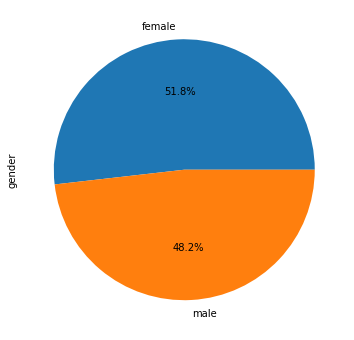

In [25]:
plt.figure(figsize=(12,6))
stu_df.gender.value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

A pie chart would be a good way to visualize the distribution

From the above diagram 52% gender of the students are female and 48% gender of the students are male, Proportion of male and female students fairly same.

<Axes: >

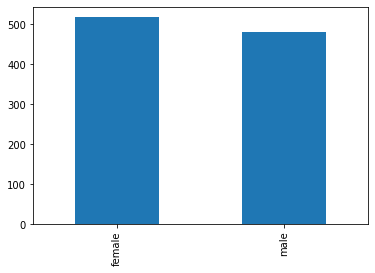

In [26]:
stu_df.gender.value_counts().plot(kind='bar')

## Education Background
Let's look at the distribution enteries for the education background.

In [27]:
stu_df["parental_level_of_education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

<Axes: >

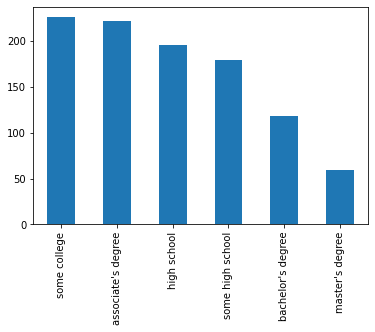

In [28]:
stu_df.parental_level_of_education.value_counts().plot(kind='bar')

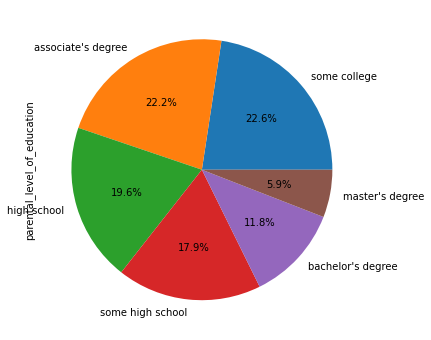

In [29]:
plt.figure(figsize=(12,6))
stu_df.parental_level_of_education.value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

Most student's parental level of education is Some college, followed by Associate's degree. Least Student's parents have a Master's degree.

In [30]:
stu_df["lunch"].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

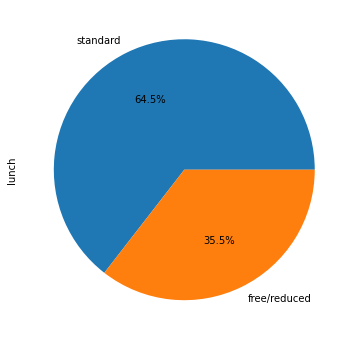

In [31]:
plt.figure(figsize=(12,6))
stu_df.lunch.value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

Most students(nearly twice) take the standard lunch.

<Axes: >

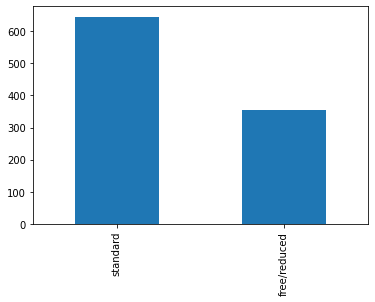

In [44]:
stu_df.lunch.value_counts().plot(kind='bar')

In [45]:
stu_df["test_preparation_course"].value_counts()

none         642
completed    358
Name: test_preparation_course, dtype: int64

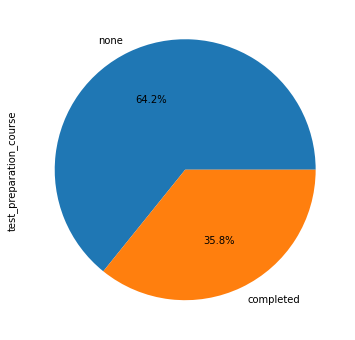

In [46]:
plt.figure(figsize=(12,6))
stu_df.test_preparation_course.value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

<Axes: >

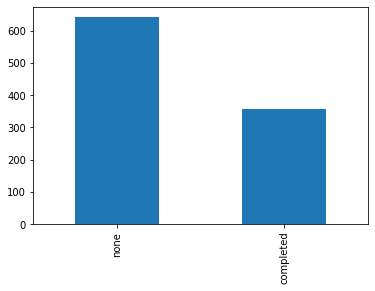

In [47]:
stu_df.test_preparation_course.value_counts().plot(kind='bar')


Most students did not complete the Test preparation course.

## Asking and Answering Questions

Let's start analyzing the scores

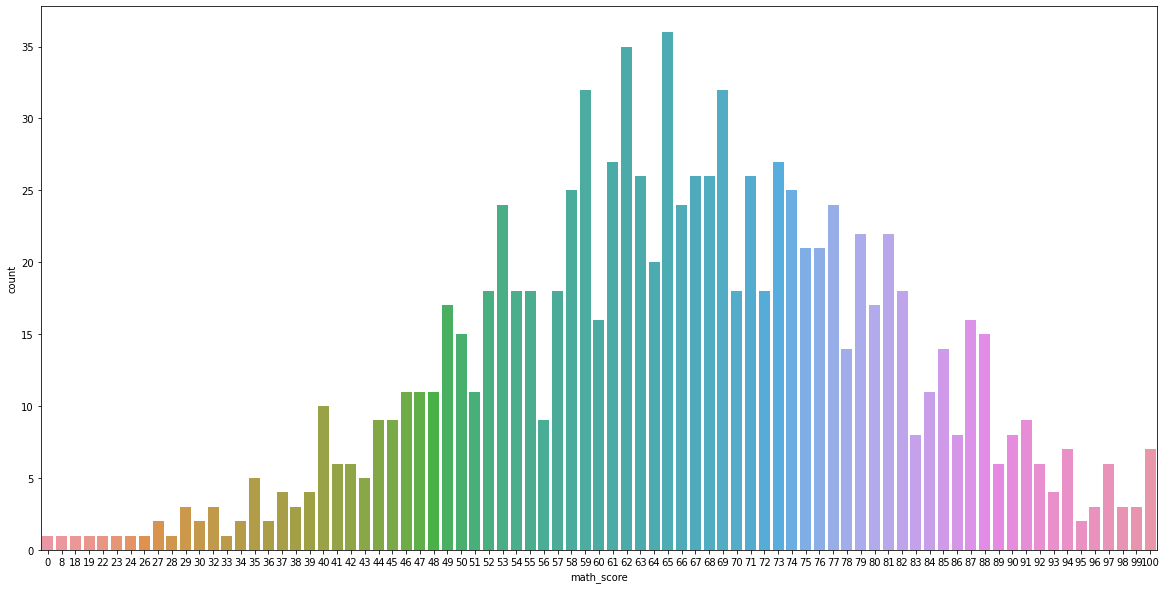

In [56]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(x='math_score', data=stu_df)
plt.show()

## Here we see the distribution of Math scores

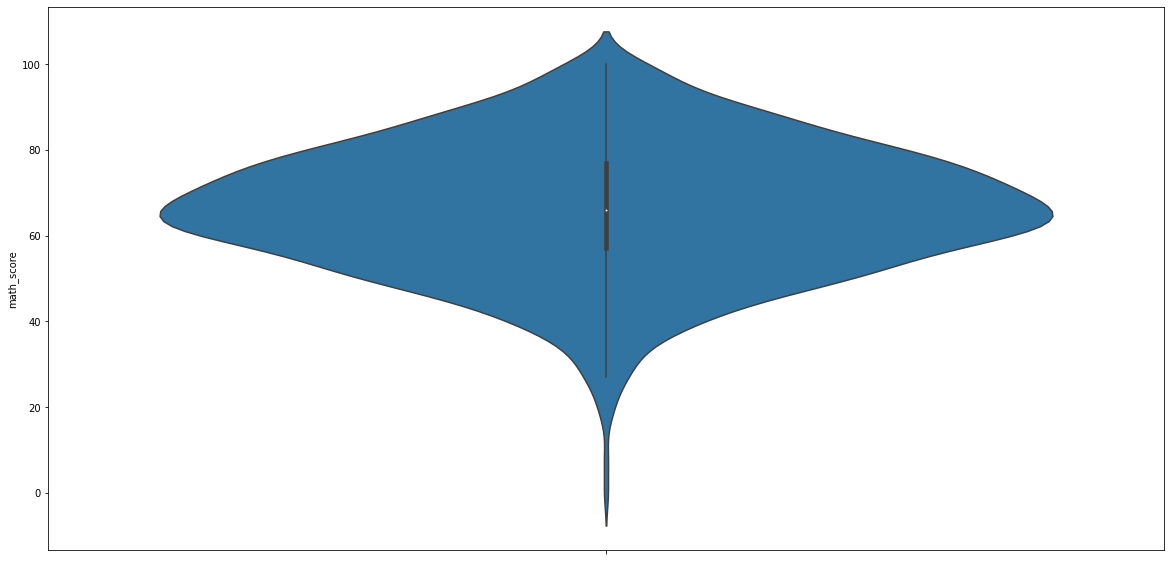

In [50]:
sns.violinplot(y='math_score',data=stu_df)
plt.show()

Maximun students have scored in the range 60-80 in Maths

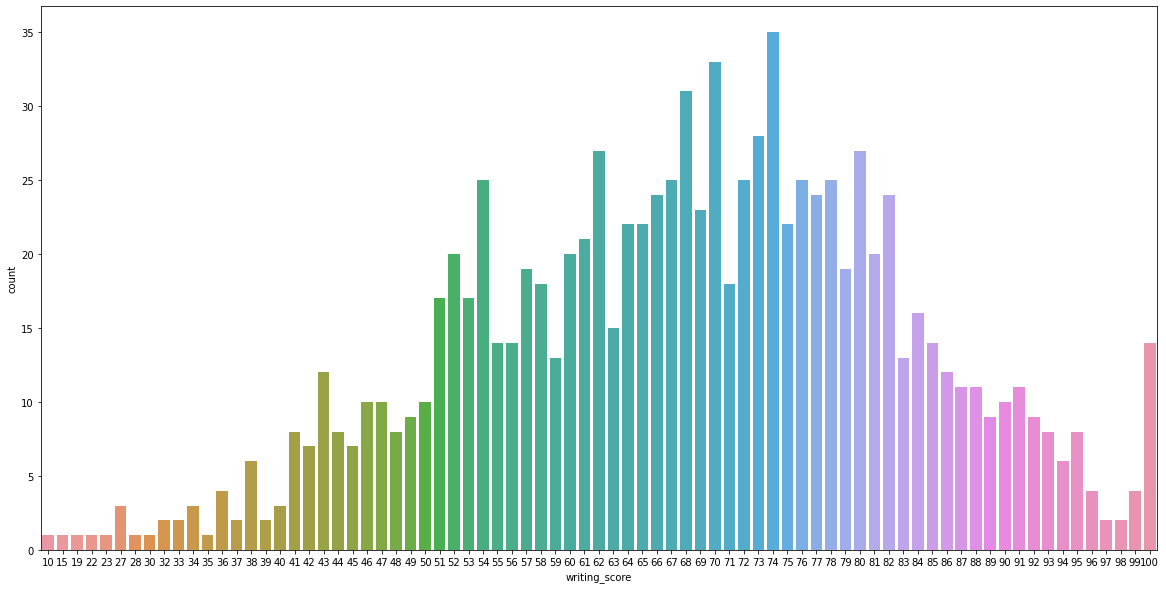

In [57]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(x='writing_score', data=stu_df)
plt.show()

Here's the distribution of writing scores

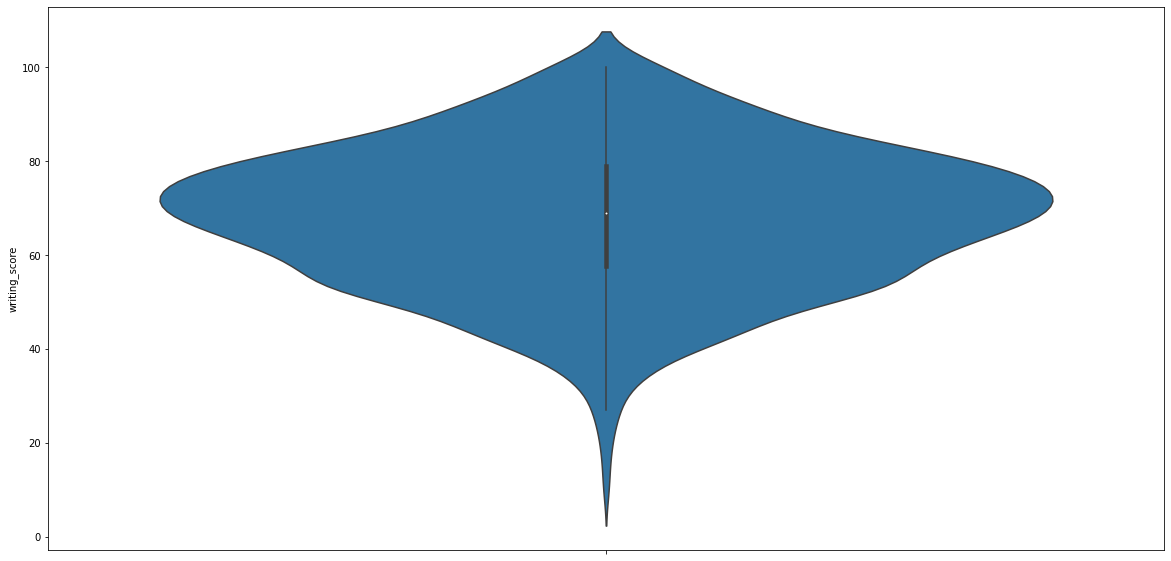

In [58]:
sns.violinplot(y='writing_score',data=stu_df)
plt.show()

Most students have scored in the range 60-80

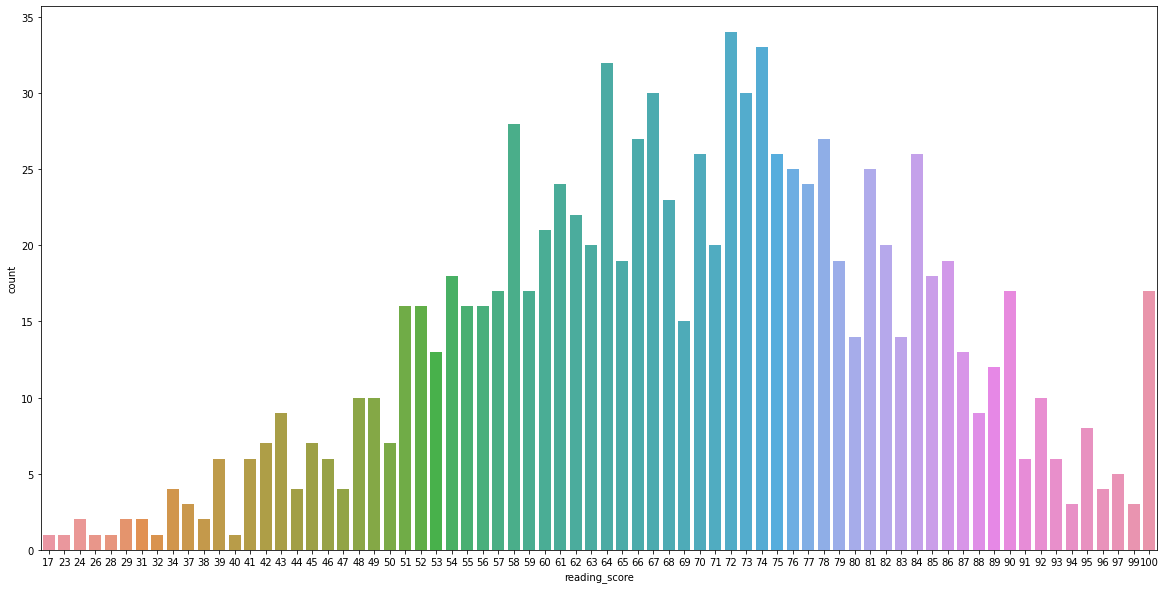

In [59]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(x='reading_score', data=stu_df)
plt.show()

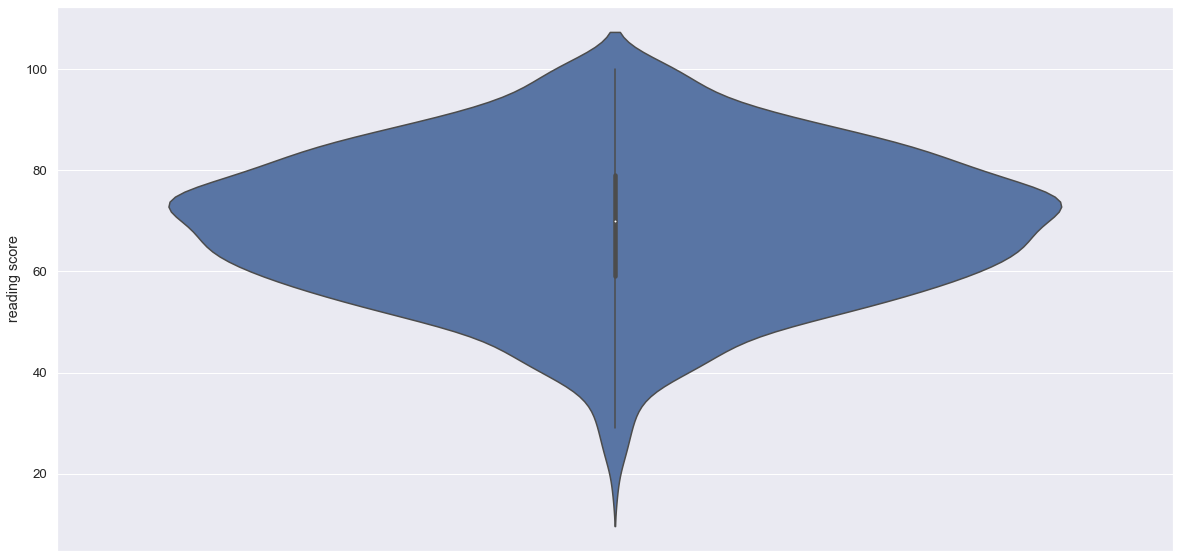

In [77]:
sns.violinplot(y='reading score',data=student_data_df)
plt.show()

Most students have scored in the range 60-80

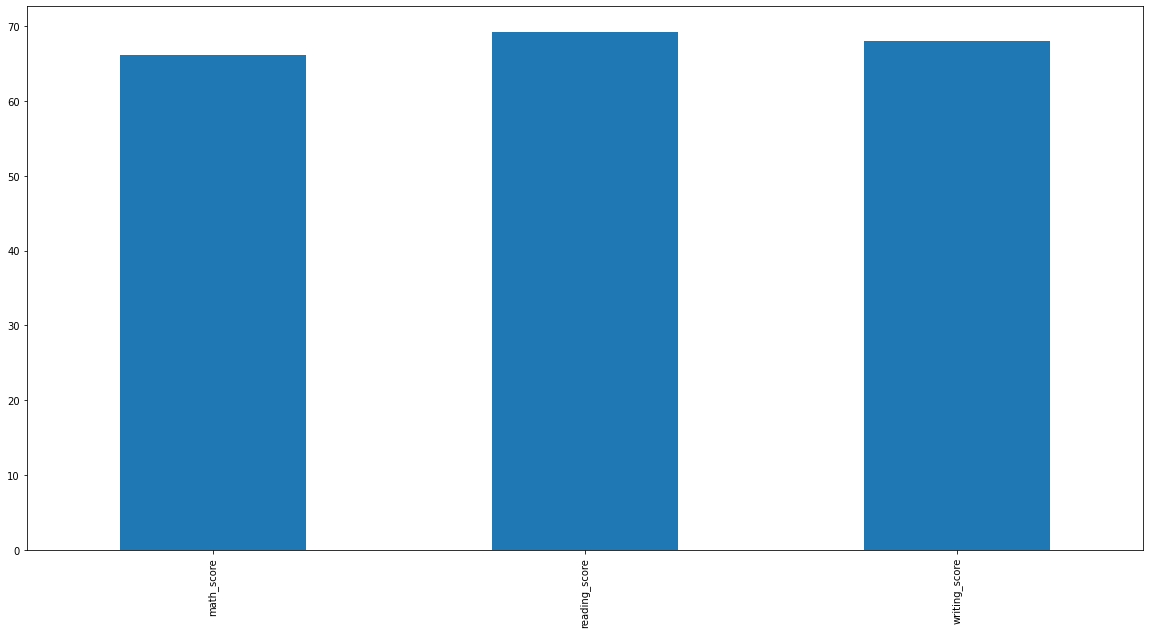

In [60]:
stu_df.mean().plot.bar()
plt.show()

Average scores are highest for Reading and lowest for Math

Now let's take a look at how various variables affect different scores

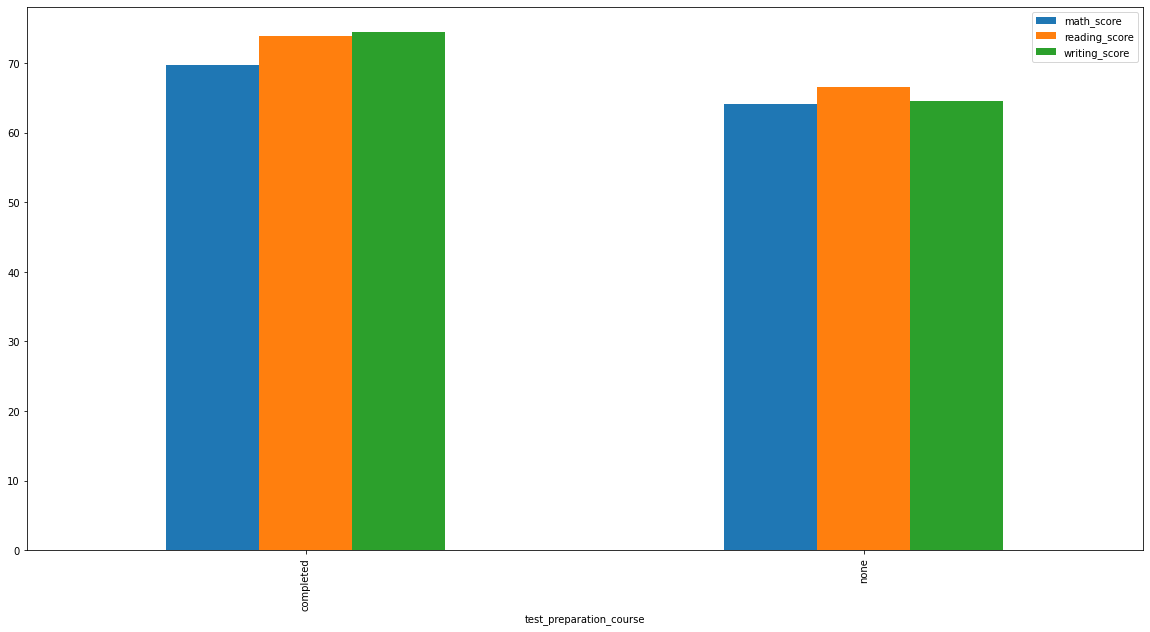

In [61]:
stu_df.groupby(["test_preparation_course"]).mean().plot.bar()
plt.show()

Average scores are higher across all subjects for students who completed the Test preparation course.

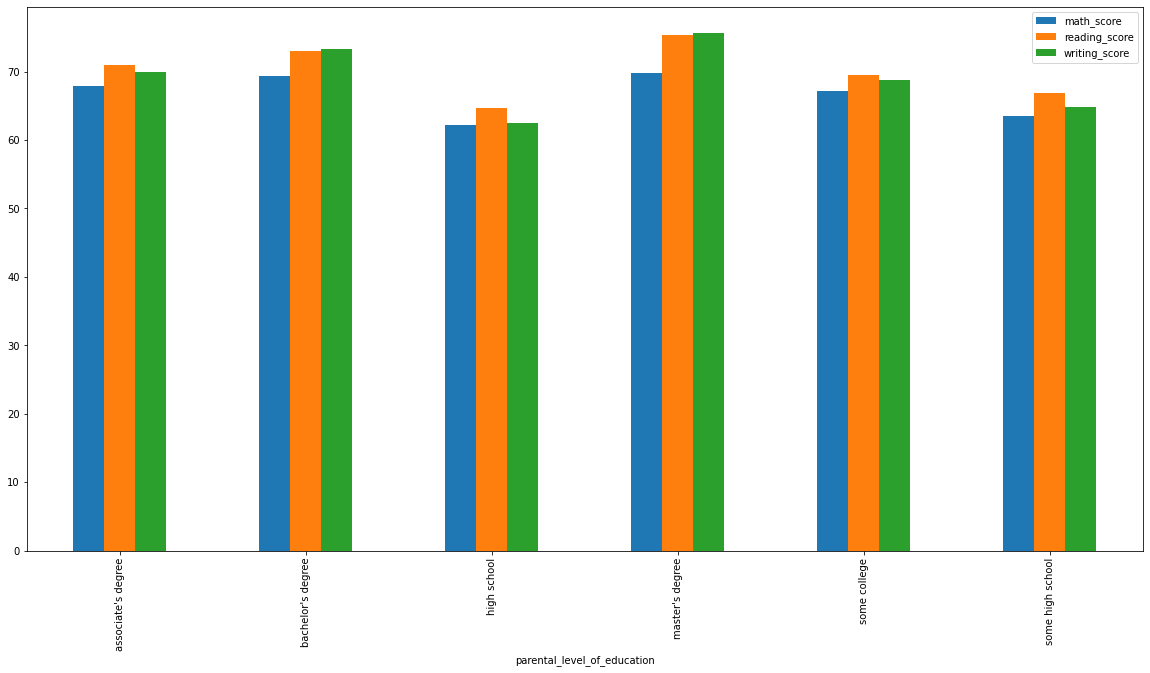

In [62]:
stu_df.groupby(["parental_level_of_education"]).mean().plot.bar()
plt.show()

Average scores are highest for students whose parents hold a master's degree.They are lowest for students whose parents have gone to just High school. Students with higher educated parents tend to perform best in Writing tests while others perform better at Reading tests.

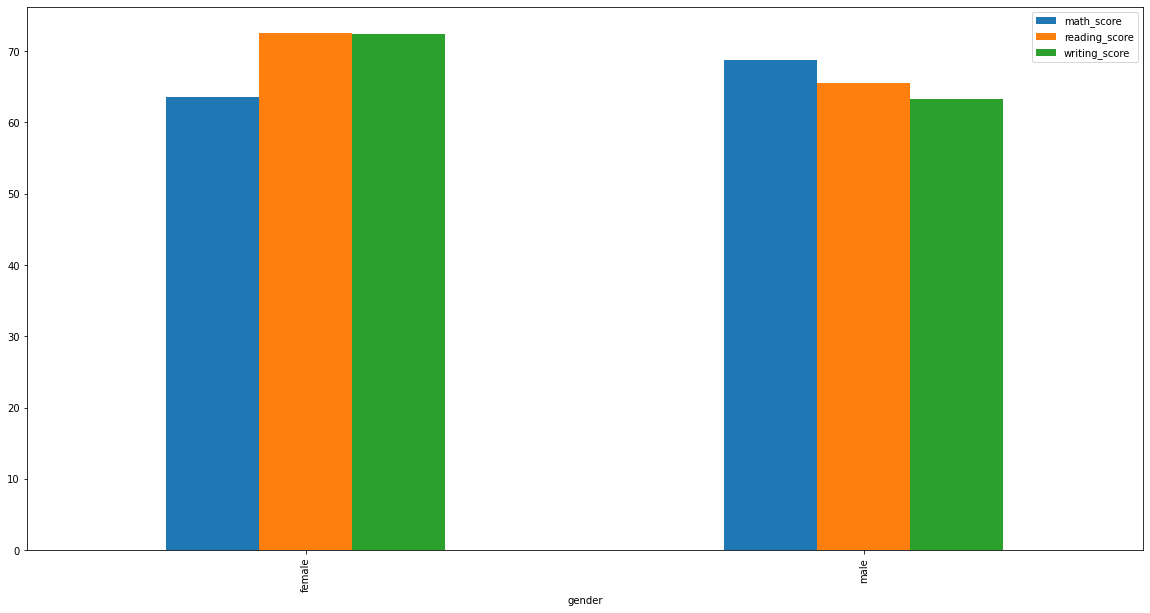

In [63]:
stu_df.groupby(["gender"]).mean().plot.bar()
plt.show()

Female students perform better at Reading and Writing tests while Male Students perform better at Maths.

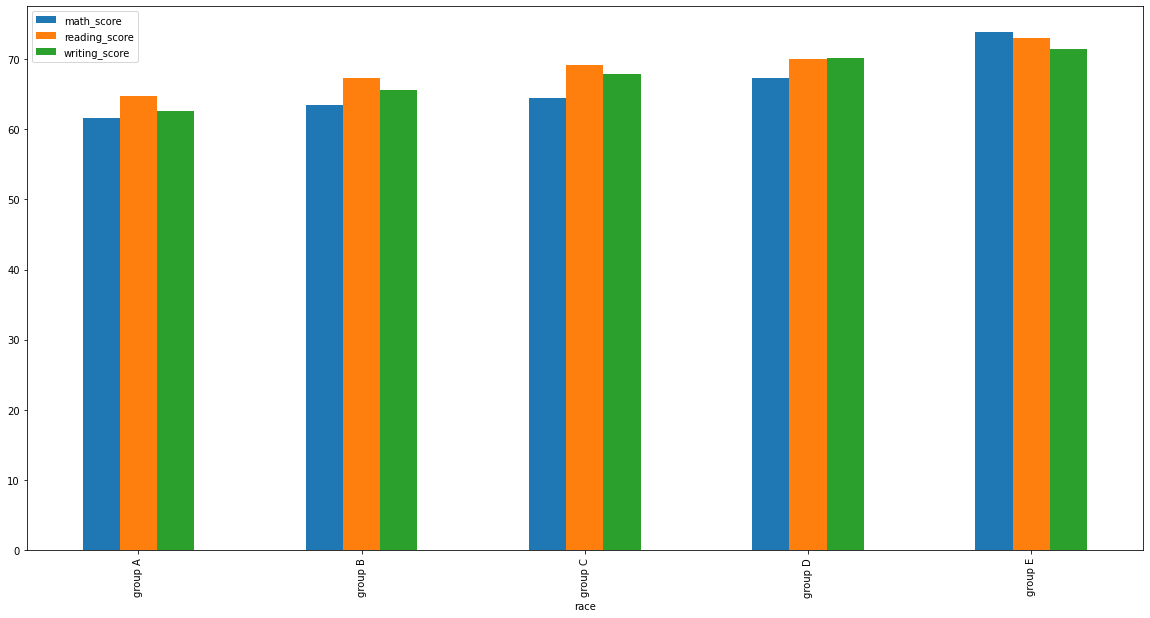

In [64]:
stu_df.groupby(["race"]).mean().plot.bar()
plt.show()

Average scores are highest for Group E students and Lowest for Group A

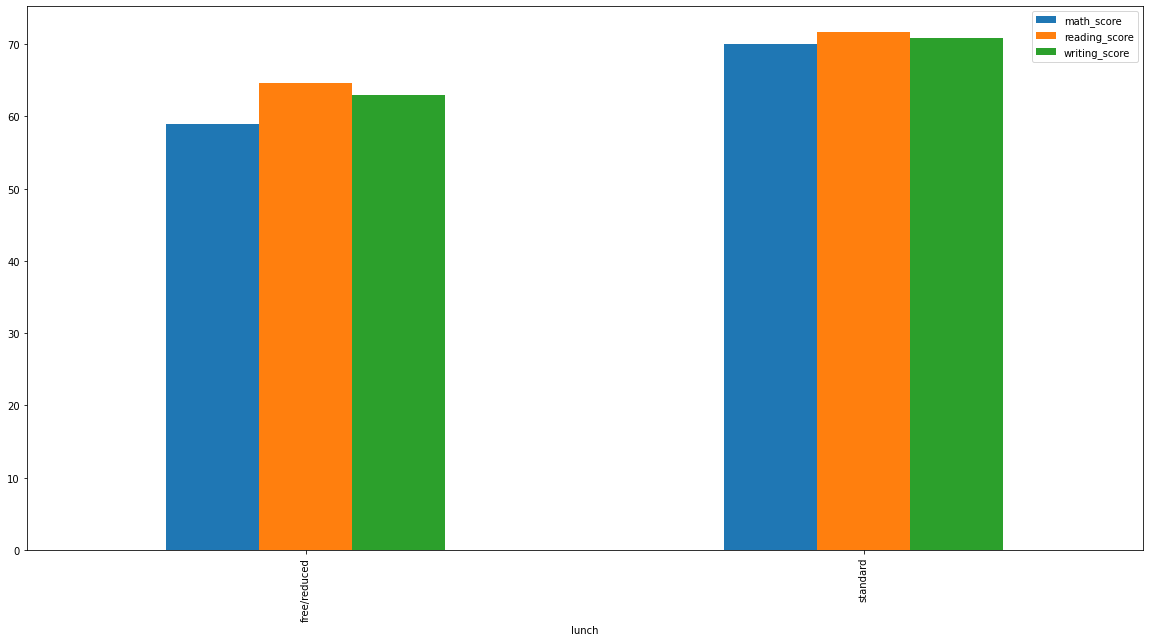

In [65]:
stu_df.groupby(["lunch"]).mean().plot.bar()
plt.show()

In [66]:
stu_df.columns

Index(['gender', 'race', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

Let's take a look at how categorical variables affect each other

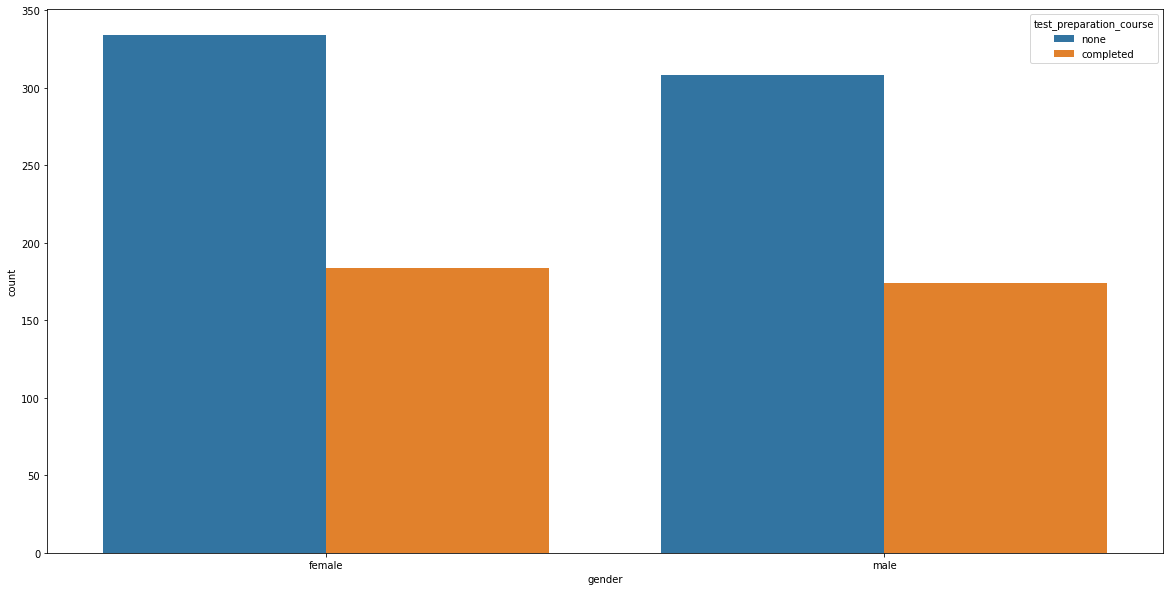

In [67]:
sns.countplot(x='gender',hue='test_preparation_course',data=stu_df)
plt.show()

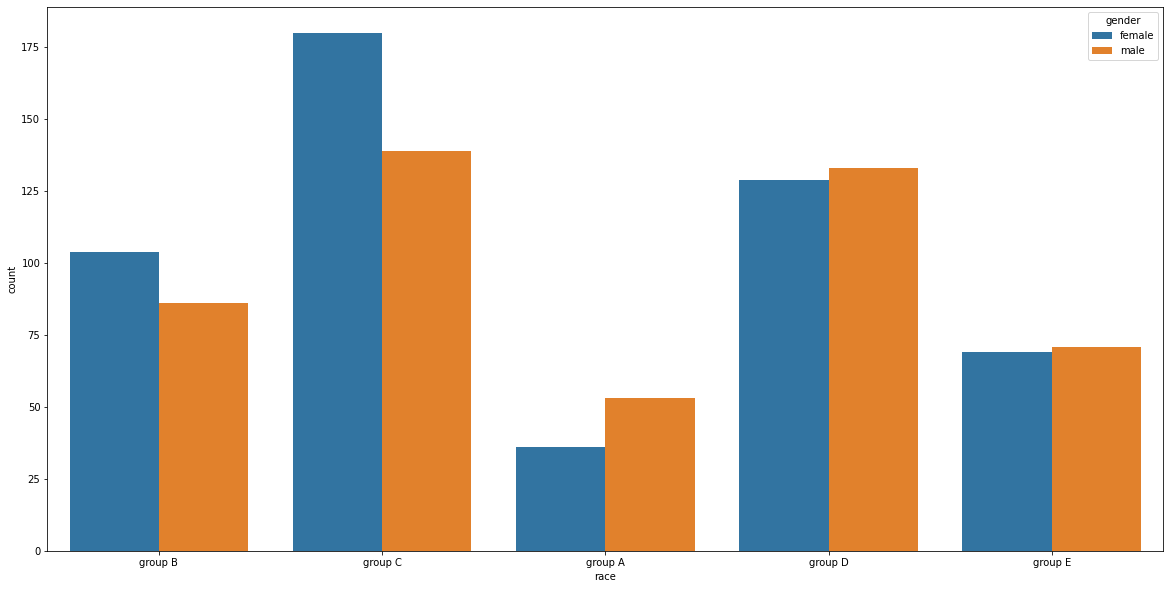

In [68]:
sns.countplot(x='race',hue='gender',data=stu_df)
plt.show()

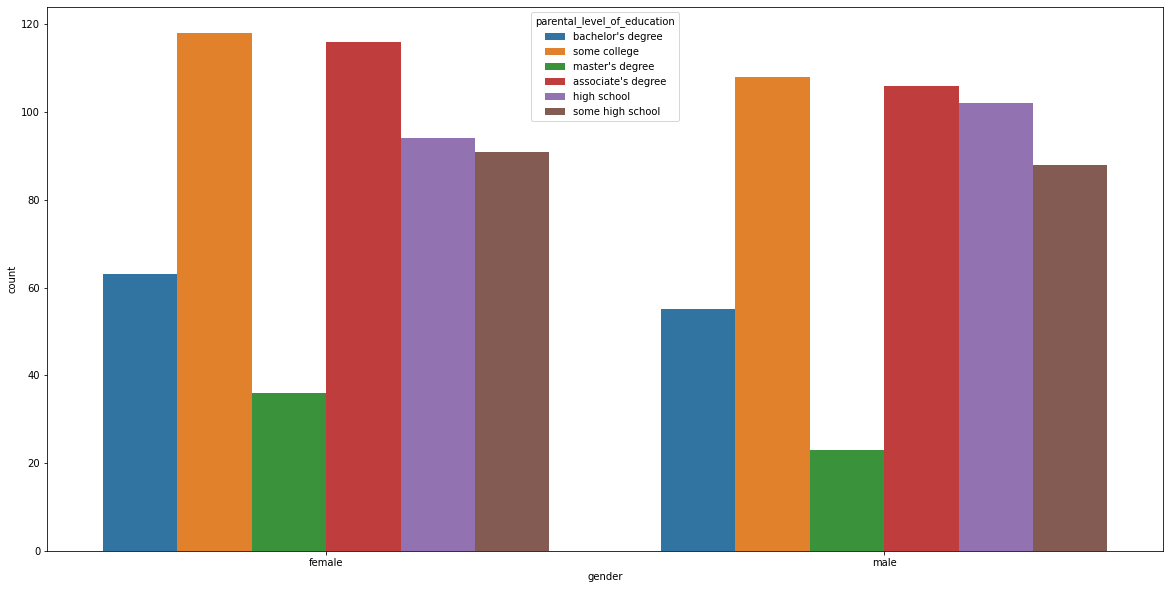

In [69]:
sns.countplot(x='gender',hue='parental_level_of_education',data=stu_df)
plt.show()

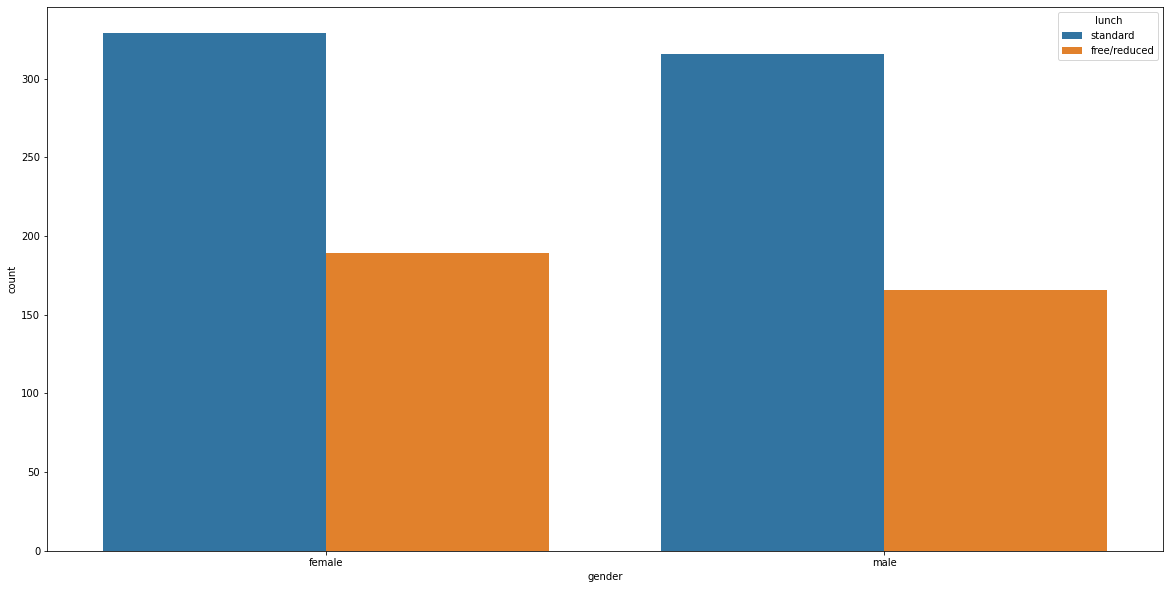

In [70]:
sns.countplot(x='gender',hue='lunch',data=stu_df)
plt.show()

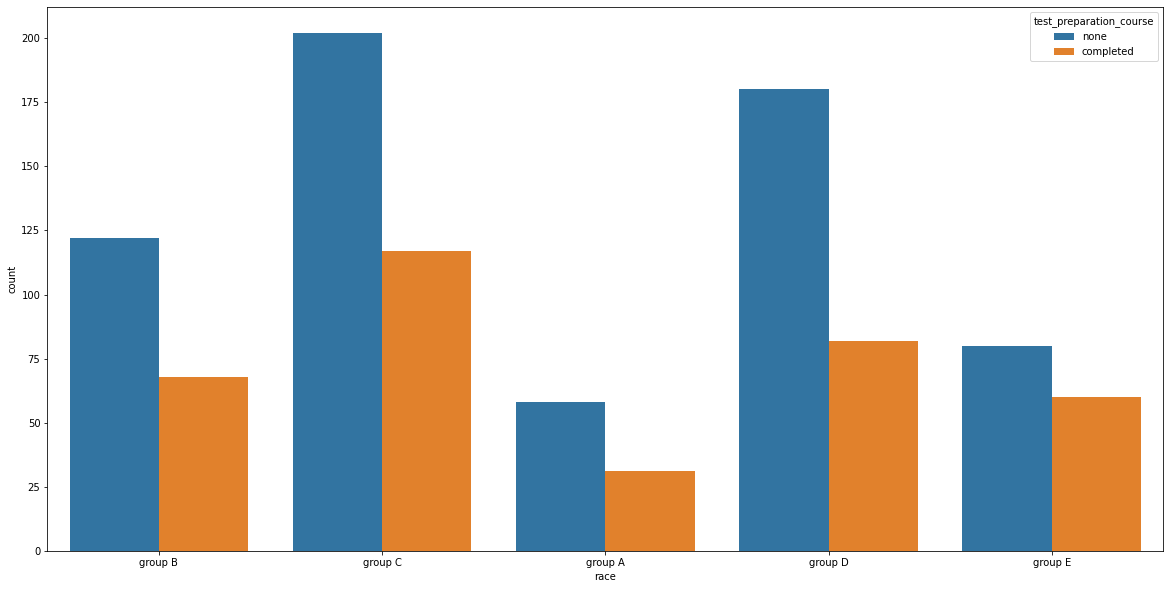

In [72]:
sns.countplot(x='race',hue='test_preparation_course',data=stu_df)
plt.show()

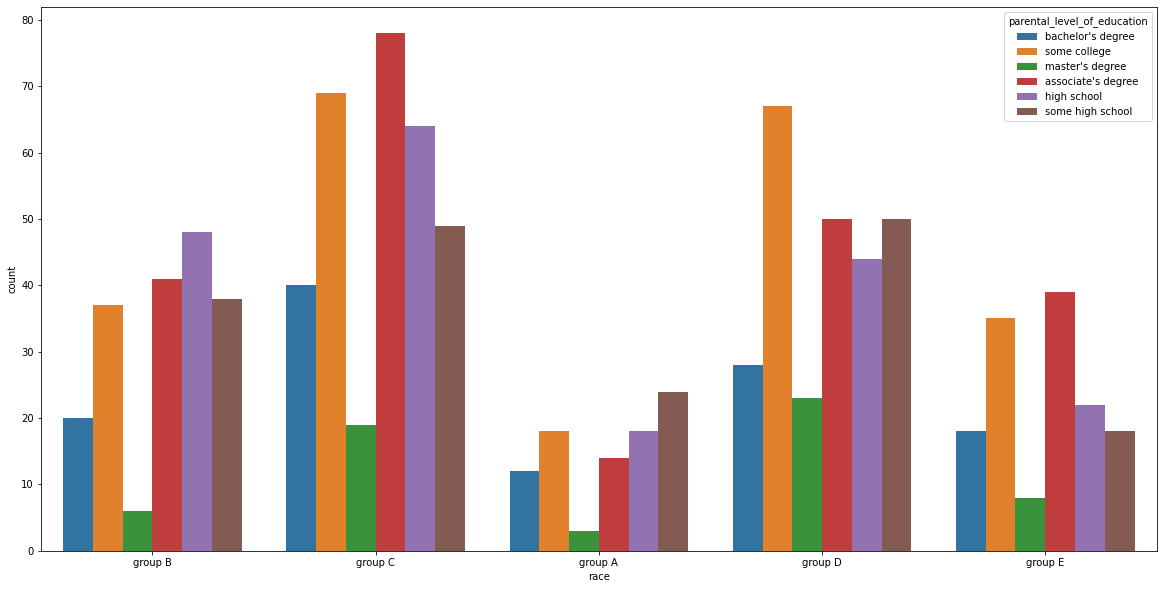

In [74]:
sns.countplot(x='race',hue='parental_level_of_education',data=stu_df)
plt.show()

### Let's find out grades

In [75]:
stu_df['total']=stu_df['math_score']+stu_df['reading_score']+stu_df['writing_score']

In [76]:
stu_df['percentage']=stu_df['total']/300*100

In [77]:
def grd(score):
    if score>=90 and score<=100:
        return 'A'
    elif score>=80 and score<90:
        return 'B'
    elif score>=70 and score<80:
        return 'C'
    elif score>=60 and score<70:
        return 'D'
    elif score>=50 and score<60:
        return 'E'
    elif  score<50:
        return 'F'
stu_df['grades']=stu_df['percentage'].apply(grd)

In [78]:
stu_df.head()

gender     race parental_level_of_education         lunch  \
0  female  group B           bachelor's degree      standard   
1  female  group C                some college      standard   
2  female  group B             master's degree      standard   
3    male  group A          associate's degree  free/reduced   
4    male  group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  total  \
0                    none          72             72             74    218   
1               completed          69             90             88    247   
2                    none          90             95             93    278   
3                    none          47             57             44    148   
4                    none          76             78             75    229   

   percentage grades  
0   72.666667      C  
1   82.333333      B  
2   92.666667      A  
3   49.333333      F  
4   76.333333      C

<Axes: >

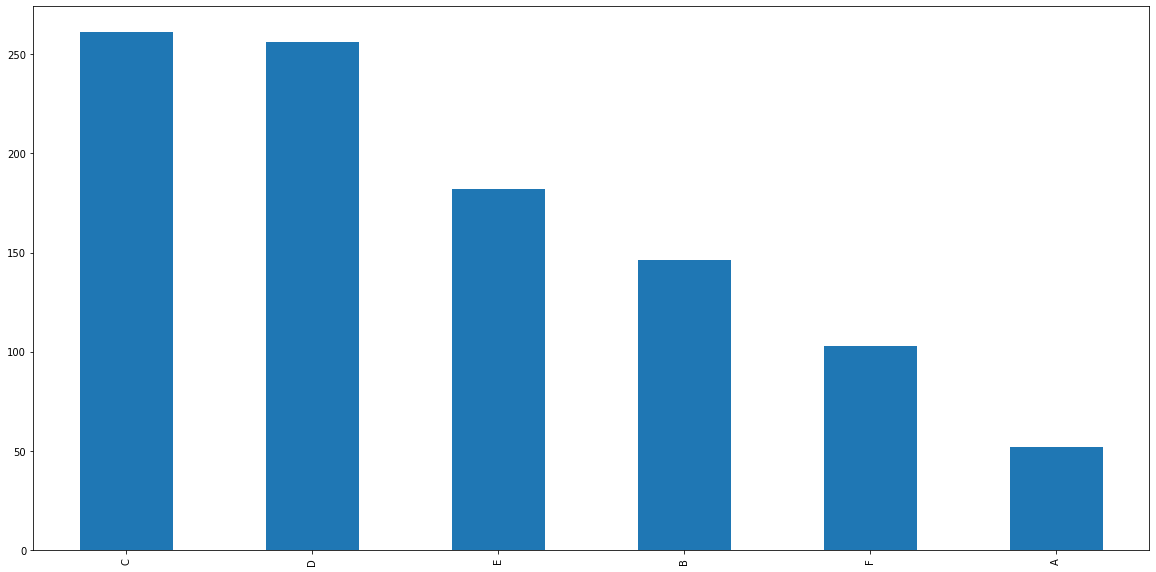

In [79]:
stu_df.grades.value_counts().plot(kind='bar')

Most students got Grade C and D. Least students got grade A

<Axes: xlabel='grades', ylabel='count'>

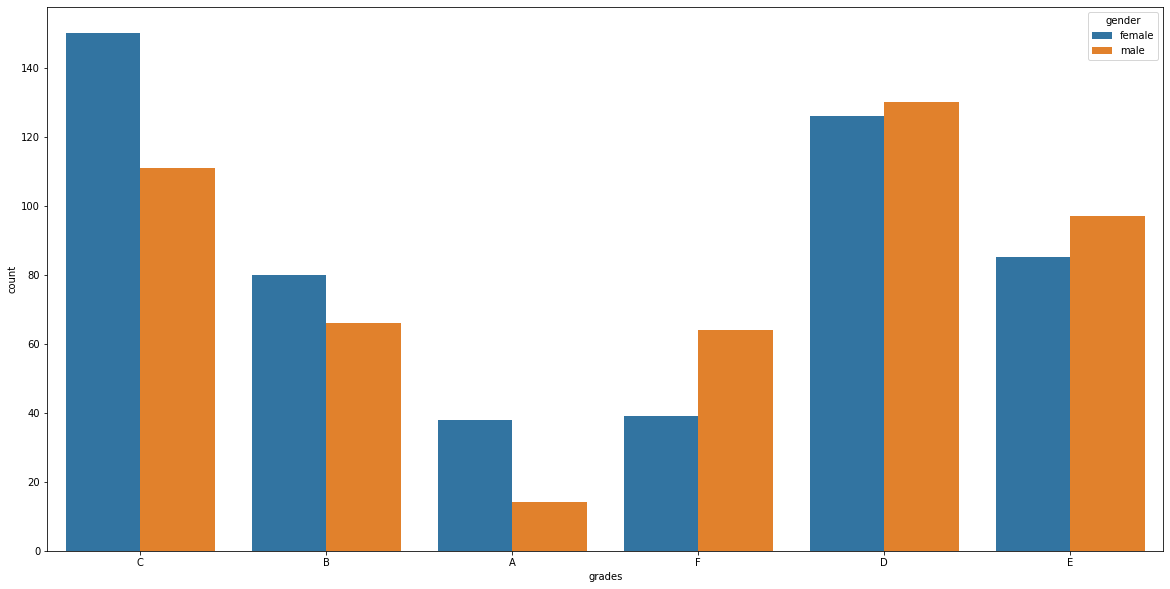

In [80]:
sns.countplot(hue='gender',x='grades',data=stu_df)

<Axes: xlabel='grades', ylabel='count'>

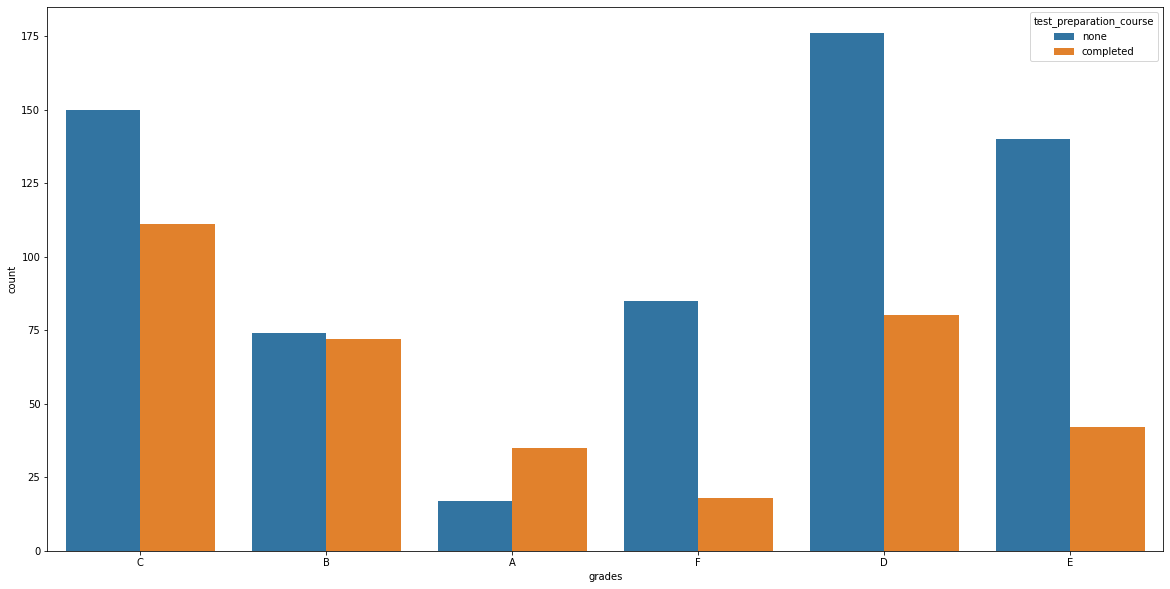

In [81]:
sns.countplot(hue='test_preparation_course', x='grades',data=stu_df)

<Axes: xlabel='grades', ylabel='count'>

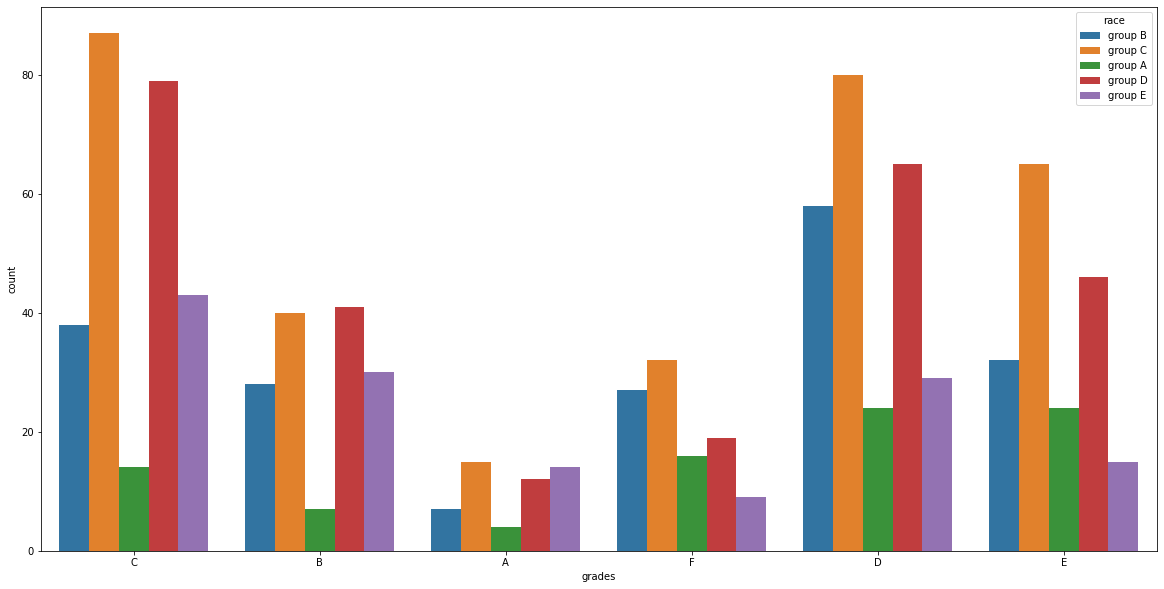

In [82]:
sns.countplot(hue='race',x='grades',data=stu_df)

<Axes: xlabel='grades', ylabel='count'>

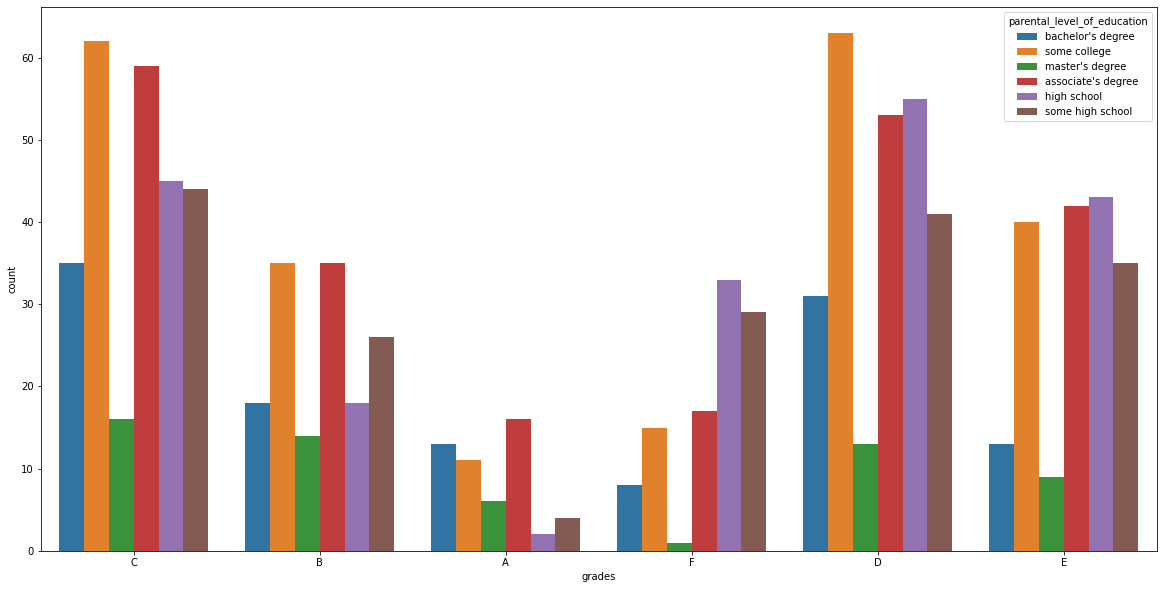

In [83]:
sns.countplot(hue='parental_level_of_education',x='grades',data=stu_df)

### Univariate Analysis

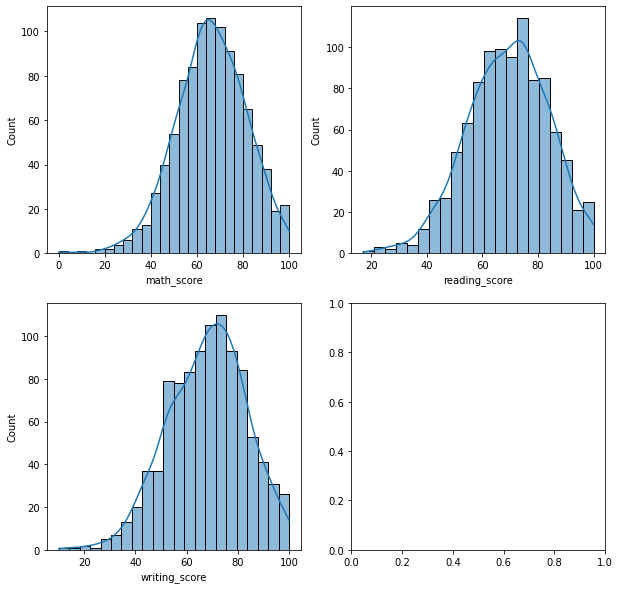

In [84]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,10)
sns.histplot(stu_df['math_score'], kde=True, ax=axes[0][0])
sns.histplot(stu_df['reading_score'] , kde=True, ax=axes[0][1])
sns.histplot(stu_df['writing_score'], kde=True, ax=axes[1][0])
plt.show()

### Bivariate Analysis

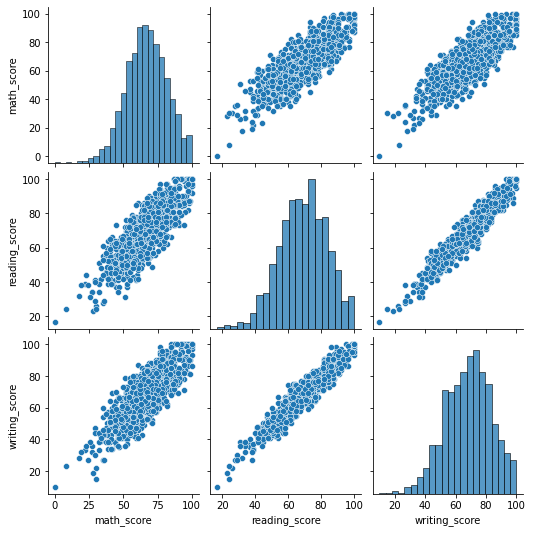

In [85]:
import seaborn as sns
sns.pairplot(stu_df[['math_score','reading_score','writing_score']])

### Checking for Correlations

<Axes: >

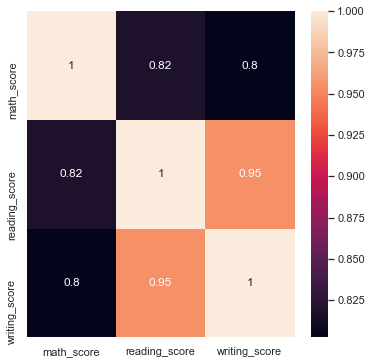

In [89]:
plt.figure(figsize=(6,6))
sns.set(font_scale=1.0)
sns.heatmap(stu_df[['math_score','reading_score','writing_score']].corr(), annot=True)

All scores are well correlated with highest correlation between reading and writing scores.

Correlation can only be calculated between numeric values. This is not possible between numeric and categorical data

So as we have analysed the impact of different features on the student's performance and we observed that factors like 'Gender', 'race/ethnicity', 'lunch', 'test preparation course' and 'parental level of education' impacted the scores obtained.

## Inferences and Conclusion

1. Proportion of male and female students almost same.

1. Most Students belong to the Group C and D of race and least to group A

1. Most students have parents who went to some college or have an associate's degree. Least student's parents have a master's Degree.

1. Almost twice as many students opted for a standard lunch

1. Only about a third of students completed the Test preparation course
1. Most students have scored marks in the Range 60-80 in all 3 subjects.
1. Most students secured the Grades C and D. Least students scored Grade A.
1. Average scores are highest for Reading and lowest for Math
1. Average scores are higher across all subjects for students who completed the Test preparation course
1. Average scores are highest for students whose parents hold a master's degree.They are lowest for students whose parents have 1. gone to just High school.
1. Students with higher educated parents tend to perform best in Writing tests while others perform better at Reading tests.
1. Female students perform better at Reading and Writing tests while Male Students perform better at Maths
1. Average scores are highest for Group E students and Lowest for Group A
1. Students opting for a standard lunch have higher scores across all subjects
1. Higher proportion of Group E students completed the Test preparation course and hence scored better marks.
1. There are more female students belonging to Group B and C. Rest have higher male students.
1. All scores are well correlated with highest correlation between reading and writing scores.
1. Very low number of students performed poorly if their parents were well educated.


So as we have analysed the impact of different features on the student's performance and we observed that factors like 'Gender', 'race/ethnicity', 'lunch', 'test preparation course' and 'parental level of education' impacted the scores obtained